<a href="https://colab.research.google.com/github/zia207/01_Generalized_Linear_Models_R/blob/main/Notebook/02_01_08_03_glm_gam_parametric_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 7.3 Generalized Additive Models (GAMs) with Parametric Terms  

Generalized Additive Models (GAMs) are a powerful extension of Generalized Linear Models (GLMs) that allow for nonlinear relationships between predictors and the response variable by modeling each predictor using smooth functions (typically splines). However, in many practical situations, some predictors may have known linear (or otherwise parametric) relationships with the response. GAMs can flexibly incorporate both smooth (nonparametric) terms and parametric terms — this is a key strength of the framework.

## Overview

GAMs extend generalized linear models (GLMs) by allowing the response variable to depend on smooth, non-linear functions of predictors, rather than assuming strictly linear relationships. The general form of a GAM is:

$$ g(\mu) = \beta_0 + f_1(x_1) + f_2(x_2) + \dots + f_m(x_m) + \text{parametric terms} $$

- $ g(\cdot) $: Link function relating the expected response $\mu$ to the predictors.

- $ f_i(\cdot) $: Smooth, non-parametric functions (e.g., splines) for predictors $x_i$.

- Parametric terms: Fixed-form terms (e.g., linear or categorical effects) like $\beta_j z_j$.

### Parametric Terms in GAMs

Parametric terms are included when certain predictors are known to have a specific functional form (e.g., linear, polynomial, or categorical). These terms are modeled explicitly, unlike the flexible smooth functions. For example:



$$ g(\mu) = \beta_0 + f_1(x_1) + f_2(x_2) + \beta_3 z_1 + \beta_4 z_2 $$

- $f_1(x_1), f_2(x_2)$: Non-linear smooth functions for continuous predictors.

- $\beta_3 z_1, \beta_4 z_2$: Parametric terms (e.g., $z_1$ could be a linear term, $z_2$ a categorical variable).



### Why Include Parametric Terms?

1. **Interpretability**: Parametric terms allow straightforward interpretation (e.g., "a unit increase in $z_1$ increases the response by $beta_3$") compared to smooth terms.

2. **Prior Knowledge**: When the relationship between a predictor and response is known to be linear or categorical, parametric terms are more efficient than estimating a flexible function.

3. **Model Efficiency**: Reduces computational complexity by avoiding unnecessary smoothing for predictors with simple relationships.

4. **Mixed Effects**: Useful for including fixed effects (e.g., categorical variables like gender) alongside smooth terms.


### Example

Suppose you're modeling house prices $y$ based on:

- Square footage ($x_1$): Modeled with a smooth function $f_1(x_1)$ to capture non-linear effects.
- Number of bedrooms ($z_1$): Modeled as a parametric term $\beta_1 z_1$, assuming a linear effect.
- Neighborhood ($z_2$): A categorical variable with parametric coefficients.

The GAM might look like:

$$ \log(y) = \beta_0 + f_1(x_1) + \beta_1 z_1 + \beta_2 \text{I}_{z_2=\text{'Suburb'}} + \beta_3 \text{I}_{z_2=\text{'City'}} $$


### Estimation

1.  **Parametric Terms**:

 -   These are fixed-form terms, such as:

    -  `Linear terms`:  $\beta_j z_j$, where $z_j$ is a continuous predictor with a linear effect.
    -  `Categorical terms`: Dummy variables for categorical predictors (e.g., $\beta_1 \text{GroupA} + \beta\_2 \text{GroupB}$).
    -  `*Polynomial terms`: $\beta_1 z_j + \beta_2 z_j^2$ for quadratic effects.
    -  `Interactions*`  $\beta*j z*{j1} z_{j2}$ for interactions between predictors.\
    -  `Purpose*` Model predictors with known or assumed simple relationships, improving interpretability and reducing model complexity.
    
2.  **Smooth Terms**:

   -  Non-linear functions $f_i(x_i)$, typically modeled using smoothing techniques like:
   -  Cubic splines, P-splines, thin plate splines, or Gaussian processes (as discussed previously).
  -  `Purpose`: Capture complex, non-linear patterns in predictors where the relationship is not easily specified parametrically.
    
3.  **Combination**:

  -   GAMs allow you to mix parametric and smooth terms in the same model, tailoring the approach to each predictor’s expected behavior.
  -   Example: In a model predicting house prices, you might use a smooth term for the non-linear effect of house size ($f(\text{size})$) and a parametric term for the number of bedrooms ($\beta \cdot \text{bedrooms}$).

### Applications

- **Ecology**: Modeling species abundance with smooth environmental effects and parametric categorical effects (e.g., habitat type).
- **Finance**: Predicting stock prices with smooth trends and parametric indicators (e.g., market sector).
- **Epidemiology**: Modeling disease rates with smooth spatial effects and parametric age/sex effects.

If you have a specific dataset or context (e.g., predictors, response type), I can tailor an example or suggest a model setup. Let me know!

### Considerations

-   **Choosing Parametric vs. Smooth Terms**:
    -   Use parametric terms when the relationship is known or assumed to be simple (e.g., linear or categorical).\
    -   Use smooth terms for predictors with unknown or complex relationships.\
    -   Domain knowledge or exploratory analysis (e.g., visualizations) can guide this choice.
-   **Model Complexity**:
    -   Including too many smooth terms can lead to overfitting, while over-relying on parametric terms may miss important non-linearities.\
    -   Model diagnostics (e.g., residual plots, AIC, or cross-validation) help assess the balance.
-   **Software Implementation**:
    -   Tools like R’s `mgcv` package (function `gam`) or Python’s `pygam` allow seamless integration of parametric and smooth terms.\

##  Generalized Additive Models (GAMs) with Parametric Terms in R

In this section we will duscuss how to fit flexible GAMs that combine smooth nonlinear effects with interpretable parametric terms in R.

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316561 sha256=11fa389782a4e5ab54a3fa8af971826937829ff15621ec4eb9b885aa8a7c6818
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [5]:
%%R
packages <- c('tidyverse',
     'plyr',
		 'rstatix',
		 'MASS',
	   'gam',
 		 'mgcv',
		 'gamm4',
 		 'gamlss',
 		 'gratia',
		 'glmmTMB',
		 'scam',
		 'gamair'

		 	  	)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr   rstatix      MASS       gam      mgcv     gamm4    gamlss 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
   gratia   glmmTMB      scam    gamair 
     TRUE      TRUE      TRUE      TRUE 


### Load packages

In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:gamair"      "package:scam"        "package:glmmTMB"    
 [4] "package:gratia"      "package:gamlss"      "package:parallel"   
 [7] "package:gamlss.dist" "package:gamlss.data" "package:gamm4"      
[10] "package:lme4"        "package:Matrix"      "package:mgcv"       
[13] "package:nlme"        "package:gam"         "package:foreach"    
[16] "package:splines"     "package:MASS"        "package:rstatix"    
[19] "package:plyr"        "package:lubridate"   "package:forcats"    
[22] "package:stringr"     "package:dplyr"       "package:purrr"      
[25] "package:readr"       "package:tidyr"       "package:tibble"     
[28] "package:ggplot2"     "package:tidyverse"   "package:tools"      
[31] "package:stats"       "package:graphics"    "package:grDevices"  
[34] "package:utils"       "package:datasets"    "package:methods"    
[37] "package:base"       


##  Standard GAM with Parametric Terms — `gamSim()` Data

We’ll start with simulated data from `mgcv::gamSim()` — designed for GAM examples.


In [8]:
%%R
# Simulate data: y ~ x0 (factor) + x1 (smooth) + x2 (smooth) + x3 (linear)
set.seed(123)
dat <- gamSim(1, n = 400, dist = "normal", scale = 2)

head(dat)
# Includes: y, x0 (factor), x1, x2, x3 (continuous)

Gu & Wahba 4 term additive model
          y        x0        x1         x2        x3         f        f0
1 12.374561 0.2875775 0.9860543 0.47068183 0.8585914 11.661995 1.5709354
2  6.588417 0.7883051 0.1370675 0.36584547 0.8873848  7.904437 1.2342112
3 14.639261 0.4089769 0.9053096 0.12127205 0.4890915 12.928857 1.9187840
4  6.832210 0.8830174 0.5763018 0.04699368 0.7180918  4.526337 0.7185887
5 11.747699 0.9404673 0.3954489 0.26279630 0.4867056 11.195150 0.3718782
6  3.032239 0.0455565 0.4498025 0.96864117 0.9887089  2.744029 0.2852637
        f1           f2 f3
1 7.185812 2.9052469566  0
2 1.315392 5.3548336534  0
3 6.114232 4.8958405724  0
4 3.166427 0.6413220700  0
5 2.205375 8.6178964416  0
6 2.458632 0.0001339619  0


### Fit a GAM with:

- Smooth terms: `s(x1)`, `s(x2)`
- Parametric terms: `x3` (linear), `x0` (categorical)

In [9]:
%%R
m1 <- gam(y ~ s(x1) + s(x2) + x3 + x0, data = dat, method = "REML")

summary(m1)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1) + s(x2) + x3 + x0

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.43276    0.28384  26.186  < 2e-16 ***
x3           1.16605    0.37951   3.073  0.00227 ** 
x0          -0.06899    0.38999  -0.177  0.85969    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
        edf Ref.df     F p-value    
s(x1) 3.072  3.818 73.22  <2e-16 ***
s(x2) 8.124  8.788 64.70  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.693   Deviance explained = 70.3%
-REML = 893.78  Scale est. = 4.685     n = 400


### Visualize smooths

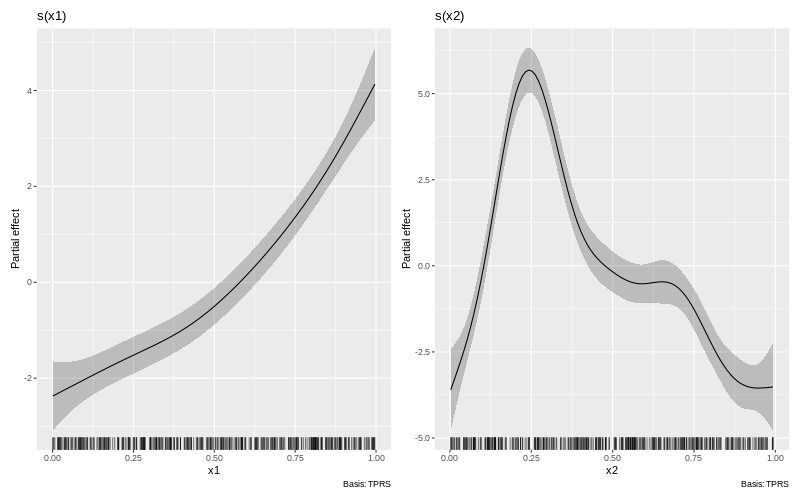

In [11]:
%%R -w 800 -h 500 -u px
# Visualize the smooth terms
draw(m1)  # from gratia — beautiful & tidy!


### Interpret parametric terms

In [12]:
%%R
# Extract parametric coefficients
coef(m1)[grepl("x0|x3", names(coef(m1)))]

         x3          x0 
 1.16604954 -0.06898557 


In [13]:
%%R
# Or use:
summary(m1)$p.table  # parametric table

               Estimate Std. Error    t value     Pr(>|t|)
(Intercept)  7.43276088  0.2838414 26.1863216 1.337790e-87
x3           1.16604954  0.3795090  3.0725216 2.273246e-03
x0          -0.06898557  0.3899865 -0.1768922 8.596859e-01


-  `x0` is treated as a factor — 3 dummy variables created automatically.  
-  `x3` has a linear slope estimate.


## GAM with Parametric Interactions — `MASS::mcycle`

Dataset: Motorcycle accident data — head acceleration (`accel`) over time (`times`). We’ll add a dummy treatment variable.

In [14]:
%%R
data(mcycle, package = "MASS")

# Create a fake "helmet" factor (for tutorial)
set.seed(456)
mcycle$helmet <- factor(sample(c("Yes", "No"), nrow(mcycle), replace = TRUE))

head(mcycle)

  times accel helmet
1   2.4   0.0    Yes
2   2.6  -1.3    Yes
3   3.2  -2.7    Yes
4   3.6   0.0     No
5   4.0  -2.7    Yes
6   6.2  -2.7     No


### Fit model: smooth time effect + parametric helmet + interaction

In [15]:
%%R
m2 <- gam(accel ~ s(times) + helmet + s(times, by = helmet),
          data = mcycle, method = "REML")

summary(m2)


Family: gaussian 
Link function: identity 

Formula:
accel ~ s(times) + helmet + s(times, by = helmet)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -28.598      2.784 -10.271   <2e-16 ***
helmetYes      6.353      4.006   1.586    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                        edf   Ref.df      F p-value    
s(times)           8.611823 8.955180 48.273  <2e-16 ***
s(times):helmetNo  1.002182 1.004349  0.415   0.520    
s(times):helmetYes 0.002516 0.005016  0.057   0.987    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 28/29
R-sq.(adj) =  0.784   Deviance explained = 80.2%
-REML =    606  Scale est. = 503.41    n = 133


This is a **varying coefficient model** — the smooth effect of `times` varies by `helmet`.

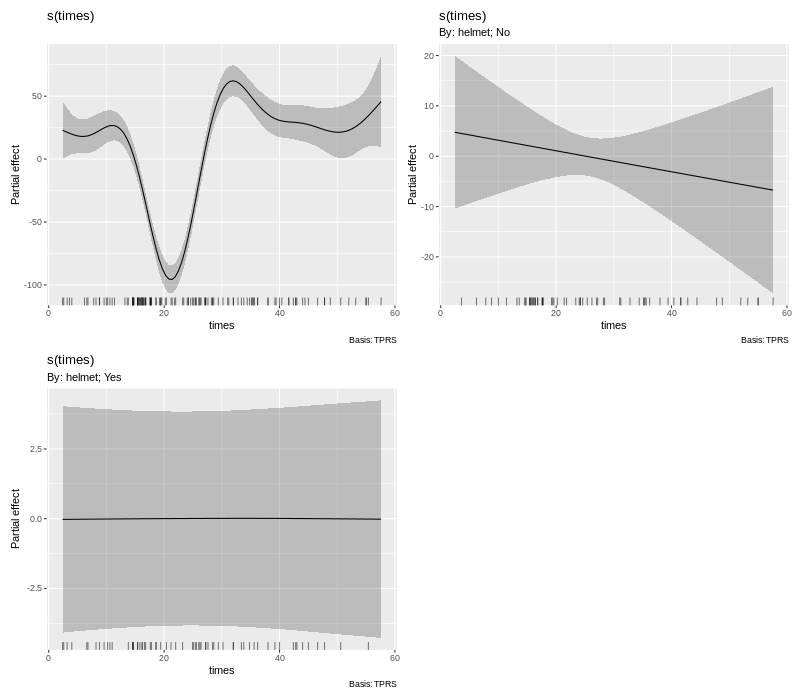

In [16]:
%%R -w 800 -h 700 -u px
# Visualize the smooth terms
draw(m2)


You’ll see **two smooth curves** — one for each helmet group — showing how the time-acceleration relationship differs by helmet use.


## GAM with Random Effects — `lme4::InstEval`

Dataset: Longitudinal math achievement scores for students in schools.

In [17]:
%%R
# Load dataset
data(InstEval, package = "lme4")

# Let's look at structure
head(InstEval)

# For speed and simplicity, let's take a random subset
inst <- InstEval %>%
  sample_n(2000)  # ← no studage_num!

###  Fit a GAMM: smooth effect of student age + parametric service + random intercept by instructor

In [18]:
%%R
# Use gamm() instead of gamm4()
m3 <- gamm(
  y ~ studage + service + lectage,
  random = list(d = ~ 1),   # ← syntax is different!
  data = inst,
  method = "REML"
)

In [19]:
%%R
summary(m3$gam)$p.table  # parametric coefficients

               Estimate Std. Error    t value   Pr(>|t|)
(Intercept)  3.25164713 0.04995239 65.0949211 0.00000000
studage.L    0.13946451 0.07378357  1.8901839 0.05887857
studage.Q   -0.01047214 0.06127989 -0.1708902 0.86432744
studage.C    0.01162707 0.05895751  0.1972109 0.84368261
service1    -0.11891448 0.06643440 -1.7899534 0.07361339
lectage.L   -0.11386129 0.08446357 -1.3480520 0.17779508
lectage.Q   -0.01130864 0.07477727 -0.1512310 0.87980886
lectage.C   -0.08361221 0.07992458 -1.0461389 0.29562396
lectage^4   -0.03860568 0.08330406 -0.4634310 0.64310616
lectage^5    0.07359854 0.08430350  0.8730187 0.38275821


### Check smooth


'gamm' based fit - care required with interpretation.
Checks based on working residuals may be misleading.


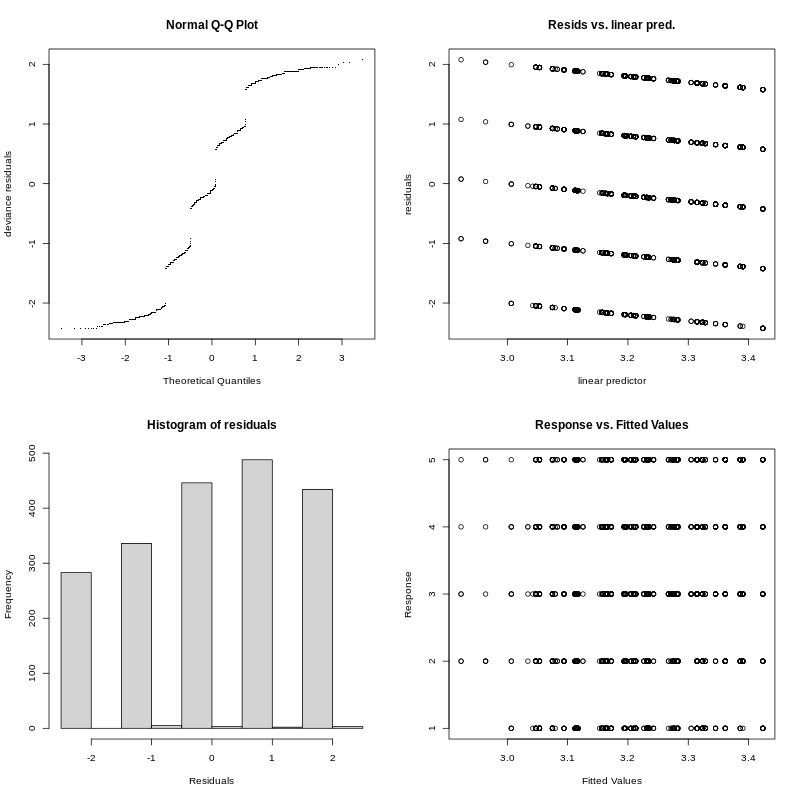

In [20]:
%%R -w 800 -h 800 -u px
# No smooths to plot — but you can check residuals
gam.check(m3$gam)

## Shrinkage & Variable Selection — `mgcv::hubble`

Dataset: Hubble’s original data on galaxy distances and velocities.

In [21]:
%%R
data(hubble, package = "gamair")

head(hubble)
# velocity (km/s), distance (Mpc)

    Galaxy    y     x
1  NGC0300  133  2.00
2  NGC0925  664  9.16
3 NGC1326A 1794 16.14
4  NGC1365 1594 17.95
5  NGC1425 1473 21.88
6  NGC2403  278  3.22



### Fit with shrinkage smooth — allows model to shrink to linear or zero


In [22]:
%%R
m4 <- gam(y ~ s(x, bs = "ts"), data = hubble,
          method = "REML", select = TRUE)

summary(m4)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, bs = "ts")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   924.37      53.22   17.37 3.17e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
      edf Ref.df     F p-value    
s(x) 1.27      9 7.331  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.742   Deviance explained = 75.6%
-REML =  164.5  Scale est. = 67978     n = 24


`bs = "ts"` = shrinkage thin plate spline.  
`select = TRUE` allows entire term to be shrunk to zero.


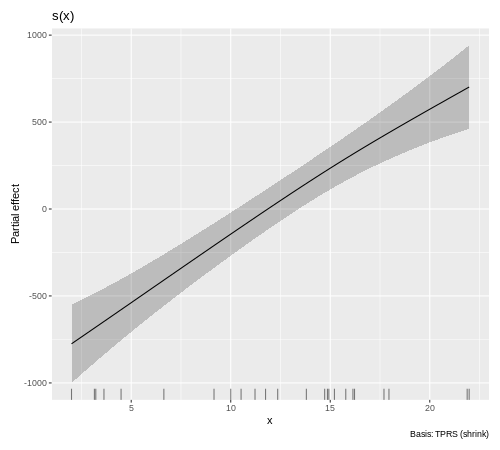

In [24]:
%%R -w 500 -h 450 -u px
draw(m4)

Compare with linear model:


In [25]:
%%R
m4_linear <- gam(y ~ x, data = hubble)
AIC(m4, m4_linear)

                df      AIC
m4        3.510587 339.7924
m4_linear 3.000000 339.7999


In this case, Hubble’s law is approximately linear — shrinkage may favor linear fit.

## Tensor Product Smooth + Parametric — Using gamSim(5)

In [26]:
%%R
# Simulate data
set.seed(567)
dat5 <- gamSim(5, n = 400)

# Add factor
dat5$fac <- factor(sample(LETTERS[1:3], nrow(dat5), replace = TRUE))

# Ensure x0 and x1 are numeric
dat5$x0 <- as.numeric(as.character(dat5$x0))
dat5$x1 <- as.numeric(as.character(dat5$x1))

Additive model + factor


### Fit: tensor smooth of age × location + gender (parametric)

In [27]:
%%R
# Fit with reduced k (since only 4 unique values)
m5 <- gam(y ~ te(x0, x1, k = 3) + fac,
          data = dat5,
          method = "REML")
# Inspect
summary(m5)


Family: gaussian 
Link function: identity 

Formula:
y ~ te(x0, x1, k = 3) + fac

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.8124     0.2919  40.474   <2e-16 ***
facB         -0.5619     0.4255  -1.320    0.187    
facC         -0.5042     0.4124  -1.223    0.222    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df     F p-value    
te(x0,x1) 3.578   3.99 66.93  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.398   Deviance explained = 40.6%
-REML = 1056.4  Scale est. = 11.715    n = 400


In [28]:
%%R
summary(m5)$p.table

              Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 11.8124296  0.2918553 40.473584 2.526658e-142
facB        -0.5618768  0.4255104 -1.320477  1.874434e-01
facC        -0.5042473  0.4124028 -1.222706  2.221727e-01


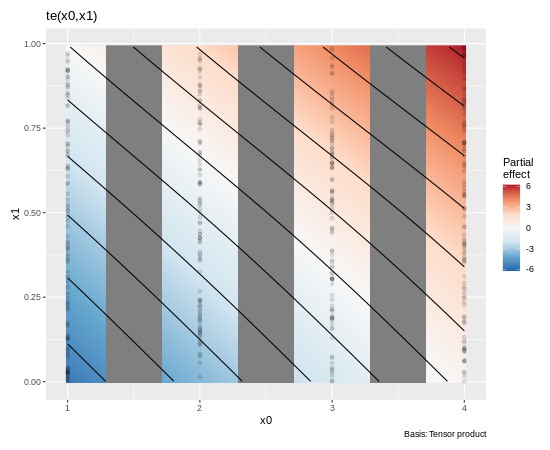

In [29]:
%%R -w 550 -h 450 -u px
draw(m5, select = 1)  # select first smooth (te term)

## Location-Scale GAM

Dataset: Simulate data set -  physical measurements (predicting number of rings = age).

In [30]:
%%R
set.seed(789)
n <- 1000
ab <- data.frame(
  length = runif(n, 0.1, 0.8),
  diameter = runif(n, 0.05, 0.6),
  height = runif(n, 0.01, 0.3)
) %>%
  mutate(
    # Mean model: rings ~ s(length) + height
    mu = 5 + 10 * length + 2 * height + rnorm(n, 0, 0.5),
    # Variance model: log(sigma) ~ s(diameter) + height
    log_sigma = -1 + 2 * diameter + 0.5 * height + rnorm(n, 0, 0.2),
    sigma = exp(log_sigma),
    rings = rnorm(n, mu, sigma)  # final response
  ) %>%
 dplyr::select(rings, length, diameter, height)

head(ab)

      rings    length  diameter     height
1 11.055180 0.5899261 0.3030613 0.27774644
2  7.145040 0.1654492 0.1666082 0.19351648
3  5.704344 0.1083208 0.1386155 0.20818428
4  8.902144 0.5141244 0.4788300 0.03657765
5  8.271372 0.4445046 0.3860073 0.28552507
6  6.445900 0.1141145 0.5475284 0.03228029


### Fit GAMLSS-style: model both mean and variance

In [31]:
%%R
m6 <- gam(list(rings ~ s(length) + height,   # mean model
               ~ s(diameter) + height),      # variance model
          family = gaulss(), data = ab, method = "REML")

summary(m6)


Family: gaulss 
Link function: identity logb 

Formula:
rings ~ s(length) + height
~s(diameter) + height

Parametric coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    9.60912    0.05952 161.454  < 2e-16 ***
height         1.47564    0.34334   4.298 1.72e-05 ***
(Intercept).1 -0.02735    0.04702  -0.582    0.561    
height.1      -0.10406    0.27243  -0.382    0.702    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                edf Ref.df Chi.sq p-value    
s(length)     2.067  2.580 4932.7  <2e-16 ***
s.1(diameter) 1.001  1.002  113.6  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Deviance explained = 83.3%
-REML = 1399.4  Scale est. = 1         n = 1000


-  `gaulss()` = Gaussian location-scale model.  
-  First formula: mean structure.  
 - Second formula: log(sigma) structure.

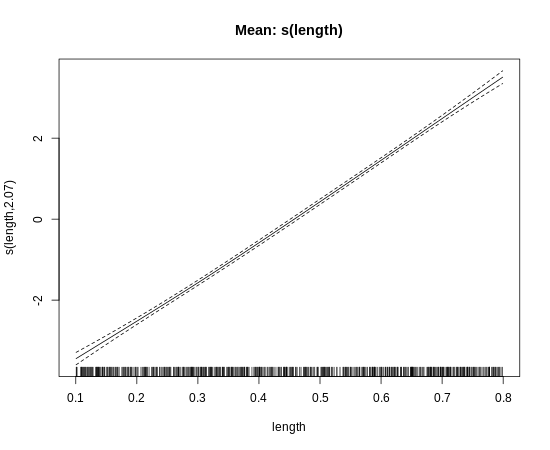

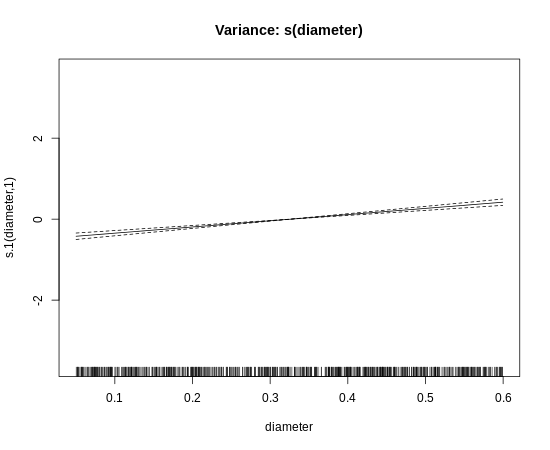

In [32]:
%%R -w 550 -h 450 -u px
plot(m6, select = 1, main = "Mean: s(length)")
plot(m6, select = 2, main = "Variance: s(diameter)")

## Zero-Inflated GAM — Simulate or Use `Salamanders` (glmmTMB)

We’ll use `glmmTMB` since `mgcv`'s `ziP()` is limited.

In [33]:
%%R
data(Salamanders, package = "glmmTMB")

head(Salamanders)
# count (many zeros), mined (Yes/No), cover, DOY, etc.

  site mined      cover sample        DOP       Wtemp       DOY spp count
1 VF-1   yes -1.4423172      1 -0.5956834 -1.22937861 -1.497003  GP     0
2 VF-2   yes  0.2984104      1 -0.5956834  0.08476529 -1.497003  GP     0
3 VF-3   yes  0.3978806      1 -1.1913668  1.01417627 -1.294467  GP     0
4  R-1    no -0.4476157      1  0.0000000 -3.02335795 -2.712216  GP     2
5  R-2    no  0.5968209      1  0.5956834 -0.14434533 -0.686860  GP     2
6  R-3    no  1.3428470      1  0.5956834 -0.01466007 -0.686860  GP     1


### Fit zero-inflated Poisson GAM

In [34]:
%%R
m7 <- glmmTMB(count ~ cover + mined + (1 | site),
              ziformula = ~ mined + DOY,
              family = poisson,
              data = Salamanders)

In [35]:
%%R
# Extract zero-inflation coefficients (matrix)
zi_coefs <- summary(m7)$zicoefficients

# Convert safely to tibble
zi_tidy <- data.frame(
  term = rownames(zi_coefs),
  estimate = zi_coefs[, 1],
  std.error = zi_coefs[, 2],
  statistic = zi_coefs[, 3],
  p.value = zi_coefs[, 4],
  row.names = NULL
) %>%
  as_tibble()

# Print results
cat("=== Zero-Inflation Model Coefficients ===\n")
print(zi_tidy)

=== Zero-Inflation Model Coefficients ===
# A tibble: 0 × 0


## Shape-Constrained GAM — `scam` with `trees` dataset

Dataset: Tree volume vs height and girth (built-in `trees` dataset)

In [36]:
%%R
data(trees)
head(trees)  # Girth, Height, Volume

  Girth Height Volume
1   8.3     70   10.3
2   8.6     65   10.3
3   8.8     63   10.2
4  10.5     72   16.4
5  10.7     81   18.8
6  10.8     83   19.7


### Fit monotonic increasing smooth for Girth → Volume

In [37]:
%%R
m8 <- scam(Volume ~ s(Girth, bs = "mpi") + Height, data = trees)
summary(m8)


Family: gaussian 
Link function: identity 

Formula:
Volume ~ s(Girth, bs = "mpi") + Height

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.13944    7.07614   0.444 0.660912    
Height       0.35568    0.09289   3.829 0.000718 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df     F p-value    
s(Girth) 2.698  3.292 211.2  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.9732   Deviance explained = 97.6%
GCV score = 8.5417  Scale est. = 7.2473    n = 31



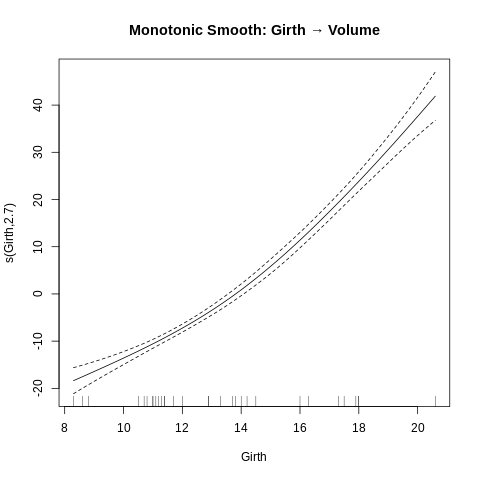

In [38]:
%%R
plot(m8, select = 1, main = "Monotonic Smooth: Girth → Volume")

-  `bs = "mpi"` = monotonic increasing P-spline.  
- `Height` is parametric linear term.

### Compare with unconstrained GAM:

In [39]:
%%R
m8_unconstrained <- gam(Volume ~ s(Girth) + Height, data = trees)
summary(m8_unconstrained)


Family: gaussian 
Link function: identity 

Formula:
Volume ~ s(Girth) + Height

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.52559    7.17647   0.213 0.833292    
Height       0.37691    0.09421   4.001 0.000459 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df   F p-value    
s(Girth) 2.693  3.368 207  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.973   Deviance explained = 97.7%
GCV = 8.4734  Scale est. = 7.1905    n = 31


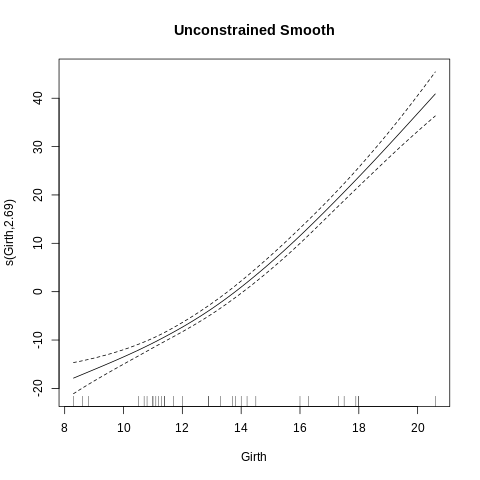

In [40]:
%%R
plot(m8_unconstrained, select = 1, main = "Unconstrained Smooth")


## Summary and Conclusion

GAMs with parametric terms offer a powerful approach to modeling data with both non-linear and simple, well-defined relationships. By combining smooth functions (e.g., splines) with parametric terms (e.g., linear or categorical), these models provide flexibility, interpretability, and efficiency. They are particularly useful in applications where some predictors have known linear or categorical effects, while others require flexible modeling. Tools like R’s `mgcv` make implementation straightforward, and careful model selection ensures optimal performance. This tutorial covered various examples, from basic GAMs to more complex models like GAMMs, location-scale models, and zero-inflated GAMs, demonstrating the versatility of this approach.

## Resources

1. *Generalized Additive Models: An Introduction with R* — Simon Wood (2017)
2. [mgcv documentation](https://cran.r-project.org/web/packages/mgcv/index.html)
3. [GAMs in R — Noam Ross (YouTube)](https://www.youtube.com/watch?v=ngHFVr9KFRQ)
4. [gratia GitHub](https://github.com/gavinsimpson/gratia)


